In [6]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import string  # special operations on strings
import spacy  # language models
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data collection and description
 importing the elon-musk's tweets csv file

In [9]:
em=pd.read_csv('/content/Elon_musk.csv',encoding='latin1')

In [10]:
em

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


2.2 Cleaning the text

In [11]:
txt = list(em.iloc[:,1])

In [12]:
txt

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [13]:
txt_upd = ' '.join(txt)

In [42]:
#Punctuation

# with arguments (x, y, z)
# where 'x' and 'y' must be equal-length strings
# and characters in 'x' are replaced by characters in 'y'.
# 'z' is a string to be deleted (string.punctuation here)txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character

txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [15]:
wordnet = WordNetLemmatizer()

In [16]:
text_tokens = word_tokenize(txt_upd)

In [17]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

 ## Creating Dataframe

In [18]:
tf = TfidfVectorizer()

In [19]:
text_tf = tf.fit_transform(tokens_without_sw)

In [20]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df

,aa,aayypcpp,abo,aboard,abort,absence,absolute,absolutely,absorb,absorption,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
word_list = ' '.join(df)

In [35]:
wordcloud = WordCloud(background_color='black',
                      width=3500,
                      height=2500).generate(word_list)

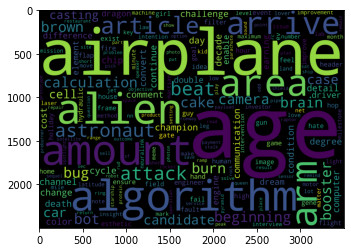

In [36]:
plt.imshow(wordcloud)

In [22]:
# Save image
#wordcloud.to_file("wordcloud.png")

# Sentimental Analysis

In [25]:
with open("/content/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [26]:
positive_words = positive_words[35:]

In [27]:
with open("/content/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [28]:
negative_words = negative_words[35:]

In [29]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [37]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2500
                     ).generate(txt_neg_in_nw)

In [38]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [39]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2500
                     ).generate(txt_pos_in_pw)

# Conclusion

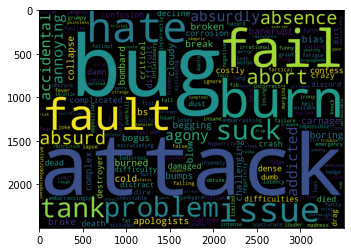

In [40]:
plt.imshow(wordcloud_neg)

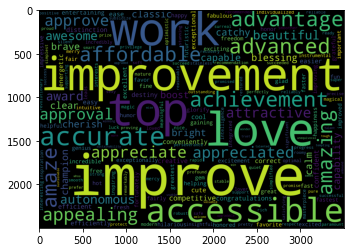

In [41]:
plt.imshow(wordcloud_pos)

In [23]:
# Save image
#wordcloud.to_file("wordcloud_pos/wordcloud_neg.png")

# Performing emotion mining on reviews of any product from ecommerce website

In [49]:
!pip install selenium 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 5.2 MB/s 
     |████████████████████████████████| 384 kB 44.1 MB/s 
     |████████████████████████████████| 140 kB 62.7 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import pandas

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk import tokenize
%matplotlib inline

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
samsung_reviews=[]

In [4]:
for i in range (1,31):
    sam=[]
    url ="https://www.amazon.in/Samsung-Galaxy-Cloud-Lavender-Storage/product-reviews/B08V9VMRQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        sam.append(reviews[i].text)
    samsung_reviews = samsung_reviews+sam

In [6]:
'''nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')'''

"nltk.download('stopwords')\nnltk.download('punkt')\nnltk.download('wordnet')"

### Downloading review from Amazon.in for samsung galaxy S20 FE

In [7]:
samsung_reviews = list(set(samsung_reviews))

### Data Cleaning

In [10]:
txt_rev = ' '.join(samsung_reviews)

In [11]:
txt_rev = re.sub("[^A-Za-z" "]+"," ",txt_rev).lower() #remove special character
txt_rev = re.sub("[0-9" "]+"," ",txt_rev).lower() #remove numbers
txt_rev = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_rev).lower() #remove hyperlink

In [12]:
text_tokens = word_tokenize(txt_rev)

In [13]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

## Creating the Dataframe

In [14]:
tf = TfidfVectorizer()

In [16]:
text_tf = tf.fit_transform(tokens_without_sw)

In [17]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
data11 =pd.DataFrame(denselist, columns=feature_names)

In [18]:
data11

,absolute,absolutely,accurate,actual,adapter,add,added,additional,adequate,adequately,...,wt,yada,year,years,yesterday,youjust,youtube,yt,zoom,zoomed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
word_list1 = ' '.join(data11)

In [20]:
wordcloud1 = WordCloud(background_color='black',
                      width=3500,
                      height=2500).generate(word_list1)

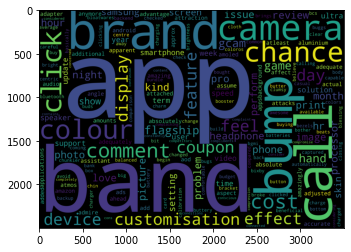

In [21]:
plt.imshow(wordcloud1)

In [24]:
# Save image
#wordcloud.to_file("wordcloud1.png")

# Sentimental Analysis

In [25]:
with open("/content/positive-words.txt","r") as pw:
    positive_words1 = pw.read().split("\n")

In [26]:
positive_words1 = positive_words1[35:]

In [27]:
with open("/content/negative-words.txt","r",encoding='latin-1') as nw:
    negative_words1 = nw.read().split("\n")

In [28]:
negative_words1 = negative_words1[35:]

In [39]:
txt_pos_in_pw1 = ' '.join([word for word in data11 if word in positive_words1])

In [43]:
txt_neg_in_nw1 = ' '.join([word for word in data11 if word in negative_words1])

In [44]:
wordcloud_pos1 = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2500
                     ).generate(txt_pos_in_pw1)

In [45]:
wordcloud_neg1 = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2500
                     ).generate(txt_neg_in_nw1)

## Wordcloud

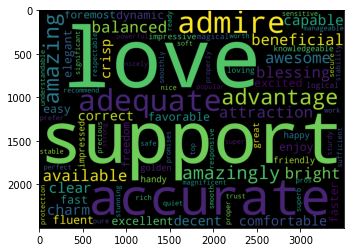

In [47]:
plt.imshow(wordcloud_pos1)

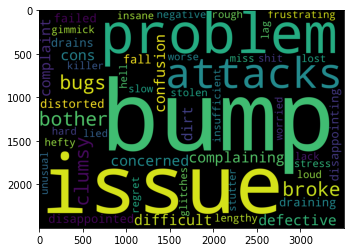

In [46]:
plt.imshow(wordcloud_neg1)